<img src="https://img.freepik.com/foto-gratis/piernas-cultivo-pateando-pelota-sobre-hierba_23-2147817394.jpg?size=626&ext=jpg" style="float:right" width="400" higth="100">


## Caso Práctico: Estudio de un dataset

### Omar Urena


# Dataset

En esta libreta vamos a trabajar con un conjunto de datos obtenido de [Kaggle](https://www.kaggle.com/abecklas/fifa-world-cup?select=WorldCupMatches.csv) que contiene los datos de la FIFA de la copa del mundo. Recomendamos acceder a este enlace para descargar los ficheros a trabajar, aunque también disponéis de los archivos ya descargados en la sección de recursos. Utilizaremos estos tres ficheros:

- WorldCupMatches.csv: Datos de los partidos disputados
- WorldCupPlayers.csv: Datos de los jugadores que han jugado en cada partido
- WorldCups.csv: Datos de las copas disputadas y los resultados

### **Configuracion Drive y Descarga del conjunto de Datos**

In [1]:
#Configuracion
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import  GoogleCredentials

#Autenticación  y creación del cliente PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
#Crear variable con el link de donde esta almacenado el conjunto de datos
link = 'https://drive.google.com/open?id=1iw3iKBdfLaE-h623JBmvt-YA9Y-vU0ta'
link1 = 'https://drive.google.com/open?id=1l6nwfgMAXnP6OVvSDhD5vn3WhZtPpR0R'
link2 = 'https://drive.google.com/open?id=1zKBAdJKsT7ppvb9_x1e_qCC1IQrwLs6D'

In [3]:
#Cargar variable ID con el indendificador del documento en el link
fluff, id = link.split('=')
fluff1, id1 = link1.split('=')
fluff2, id2 = link2.split('=')
print(f'1- {id} 2- {id1} 3- {id2}')

1- 1iw3iKBdfLaE-h623JBmvt-YA9Y-vU0ta 2- 1l6nwfgMAXnP6OVvSDhD5vn3WhZtPpR0R 3- 1zKBAdJKsT7ppvb9_x1e_qCC1IQrwLs6D


In [4]:
#Descargar el conjunto de datos del fichero en Drive
downloaded = drive.CreateFile({'id':id})

downloaded.GetContentFile('WorldCupMatches.csv')

# Introducción

Mediante esta libreta vamos a explorar los datos almacenados en estos tres ficheros y a responder preguntas haciendo operaciones y transformaciones con pandas. Además de completar las celdas de código para responder a los ejercicios, cuando así se indique se deberá añadir una celda de tipo _markdown_ explicando con texto enriquecido la información o las conclusiones extraídas.

In [5]:
import pandas as pd

In [6]:
# Cargamos el conjunto de datos WorldCupMatches
df_partidos = pd.read_csv("./WorldCupMatches.csv")

## 1. Exploración


In [7]:
#visualizamos las primera filas del conjunto de datos para familiarizarnos con las informaciones alamcenadas.
df_partidos.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [8]:
#visualizamos aspectos generales:
#Cantidad de colunmas: 20 / Cantidad de filas: 4,572 de las cuales 852 no contienen valores perdidos excepto la variable "Attendance" 850 filas != null,
#En principio podemos determinar que necesitaremos utilizar alguna técnica para los valores perdidos o faltantes y lo contienen todas las variables.
#Tipos de datos por colunma, tenemos dos tipo de datos 1 - 8 columnas float64 o tipo decimal, 12 columnas object tipo categorica.
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [9]:
#Observamos las estadisticas descritivas y generales del conjunto de datos para la variables o columnas numericas.
#Year: a simple vista determinamos el rango de años de va desde 1930 hasta 2014.
#La maxima cantidad de goles anotados en un partido para un equipo en su casa es 10 Goles y como visitante es 7 Goles -
#para un promedio de 1.8 goles por lo que estos maximos no suceden frecuentemente.
#Half-time podemos observar que en promedio las mayorias de los goles se anotan para el medio tiempo en particular cuando juegan en casa que como visitante.

df_partidos.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,852.0,1.985089e+03,2.244882e+01,1930.0,1970.00,1990.0,2002.00,2014.0
Home Team Goals,852.0,1.811033e+00,1.610255e+00,0.0,1.00,2.0,3.00,10.0
Away Team Goals,852.0,1.022300e+00,1.087573e+00,0.0,0.00,1.0,2.00,7.0
Attendance,850.0,4.516480e+04,2.348525e+04,2000.0,30000.00,41579.5,61374.50,173850.0
Half-time Home Goals,852.0,7.089202e-01,9.374141e-01,0.0,0.00,0.0,1.00,6.0
Half-time Away Goals,852.0,4.284038e-01,6.912519e-01,0.0,0.00,0.0,1.00,5.0
RoundID,852.0,1.066177e+07,2.729613e+07,201.0,262.00,337.0,249722.00,97410600.0
MatchID,852.0,6.134687e+07,1.110572e+08,25.0,1188.75,2191.0,43950059.25,300186515.0


## 2. Limpieza de datos

Una de las cosas que llama la atención es la alta presencia de valores perdidos en el DataFrame `df_partidos`. Cuando trabajamos con datos obtenidos del mundo real siempre nos toparemos con problemas relacionados con la medición, captura o almacenamiento de dicha información.


### **Analisis de valores faltantes**


Por los patrones de inconsistencias en los datos en todas las columnas se deben a perdida completamente aleatoria, los registro estan vacios en todas las columnas para este caso eliminamos las filas con la funcion dropna, sin embargo no es el mismo caso en dos filas de la columna "Attendance" ya que las demas columnas tienen registros, estas se deben a una perdida no aleatoria por un error en el registro o mas bien falta del registro de la asistencia, observamos que la fila esta duplicada por la similitud de los registros en las demas columnas en este caso eliminé el duplicado y luego use la técnica de imputacion por el promedio de las asistencias en ese estadio.

In [10]:
#Revisamos las columnas que contienen valores perdidos y sumamos sus filas
df_partidos.isna().sum().to_frame('Na')

,Na
Year,3720
Datetime,3720
Stage,3720
Stadium,3720
City,3720
Home Team Name,3720
Home Team Goals,3720
Away Team Goals,3720
Away Team Name,3720
Win conditions,3720


In [11]:
#Filtramos las primeras filas que contienen valores perdidos NaN.
df_partidos[df_partidos.isna()].head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Filtramos las primeras filas que contienen valores perdidos NaN de la columna "Attendance" la cual cambia el patron en el numero de valores perdidos
df_partidos[df_partidos['Attendance'].isna()].head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Imputamos los valores perdidos en la columna "Attendece" usado la tecnica del promedio en las asistencias en el estadio y año.
import numpy as np

Attendance_fillNa = df_partidos['Attendance'][df_partidos['Stadium'] == 'Estadio Beira-Rio'][df_partidos['Year']== 2014].mean()

df_partidos['Attendance'] = df_partidos['Attendance'].replace(np.nan, Attendance_fillNa)

Asistencias_na = sum(df_partidos['Attendance'].isna())

print(f'Cantidad de valores perdidos en "Attendance: {Asistencias_na} NaN')

Cantidad de valores perdidos en "Attendance: 0 NaN


In [14]:
#identificamos por el MatchID el duplicado luego de la imputacion para proceder a eliminar uno.
df_partidos[df_partidos['MatchID'] == 300186460]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,42976.5,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,42976.5,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG


In [15]:
#Eliminar duplicado

df_partidos.drop([823], axis=0, inplace=True)

df_partidos.reset_index()

df_partidos[df_partidos['MatchID'] == 300186460]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,42976.5,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG


In [16]:
#Eliminamos los valores perdidos usando la funcion DropNa
df_partidos = df_partidos.dropna()

#Validamos
print(f'Cantidad de valores perdidos en el Dataset: {sum(df_partidos.isna().sum())} NaN')

Cantidad de valores perdidos en el Dataset: 0 NaN


## 3. Cargar datos

Al igual que hemos cargado los datos de los partidos en `df_partidos`, crear las variables `df_jugadores` y `df_copas` que contengan los dataframes correspondientes a la lectura de los csv `WorldCupPlayers` y `WorldCups` (usar `pd.read_csv)`.


In [17]:
# Cargamos el conjunto de datos
downloaded1 = drive.CreateFile({'id':id1})

downloaded1.GetContentFile('WorldCupPlayers.csv')
#Jugadores
df_jugadores = pd.read_csv("./WorldCupPlayers.csv")

In [18]:
# Cargamos el conjunto de datos
downloaded2 = drive.CreateFile({'id':id2})

downloaded2.GetContentFile('WorldCups.csv')
#Copas
df_copas = pd.read_csv("./WorldCups.csv")

## 4. Rango temporal


In [19]:
# ¿Cuál es el año del mundial más antiguo disputado?
print(f'¿Cuál es el año del mundial más antiguo disputado? Es del año: {df_copas.Year.min()}')

#¿Y el año del mundial más reciente?
print(f'¿Y el año del mundial más reciente? Es el año: {df_copas.Year.max()}')

¿Cuál es el año del mundial más antiguo disputado? Es del año: 1930
¿Y el año del mundial más reciente? Es el año: 2014


In [20]:
year = df_copas.Year.isin([1930,2014])

df_copas.loc[year]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


## 5. Asistencia de público

La columna `Attendance` indica la asistencia de público en cada mundial. Pandas ha cargado esta columna como tipo string, ya que los valores indicados contienen puntos como separador de millares. En primer lugar vamos a transformar esta columna para que no contenga el caracter `.`. Posteriormente transformaremos esta columna a formato numérico usando la función [pd.to_numeric](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html).


In [21]:
df_copas["Attendance"] = pd.to_numeric(df_copas["Attendance"].str.replace(".", ""))

#df_copas = pd.read_csv("./WorldCups.csv", thousands=".")

<ipython-input-21-b0b46b0b30cb>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copas["Attendance"] = pd.to_numeric(df_copas["Attendance"].str.replace(".", ""))


Teniendo en cuenta todos los datos de `df_copas`, ¿Cuál fué la mayor asistencia de un mundial? ¿Cuál es la asistencia media?

In [22]:
# ¿Cuál fué la mayor asistencia de un mundial?
print(f'¿Cuál fué la mayor asistencia de un mundial? {df_copas.Attendance.max():,.0f}')

#¿Cuál es la asistencia media?
print(f'¿Cuál es la asistencia media? {df_copas.Attendance.mean():,.0f}')


¿Cuál fué la mayor asistencia de un mundial? 3,587,538
¿Cuál es la asistencia media? 1,872,882


## 6. Asistencia de público en función del país

Sabemos que, dependiendo del país donde se celebre la copa del mundo, ésta tiene un mayor o menor impacto o relevancia. Vamos a calcular la media de asistencia agrupando por país. Finalmente, ordenar los resultados por orden decreciente de este número medio de asistentes.

In [23]:
df_personas = pd.DataFrame(
    [
        ("Juan", "male", 56),
        ("Laura", "female", 23),
        ("José", "male", 46),
        ("Rosa", "female", 26)
    ], columns=["name", "gender", "age"])

# edad media de todas las personas
edad_media = df_personas["age"].mean()
# edad media agrupando por género
edad_media_por_genero = df_personas.groupby("gender").mean()[["age"]]

print(f"La edad media de las {len(df_personas)} es de {edad_media} años.")
print(f"La edad media agrupada por género es:")
edad_media_por_genero

La edad media de las 4 es de 37.75 años.
La edad media agrupada por género es:


<ipython-input-23-7babdea96f0b>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edad_media_por_genero = df_personas.groupby("gender").mean()[["age"]]


,age
gender,
female,24.5
male,51.0


In [24]:
#Vamos a calcular la media de asistencia agrupando por país y por orden decreciente.

df_copas.groupby("Country").mean("Attendance").sort_values("Attendance", ascending=False)

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
Country,,,,,
USA,1994.0,141.0,24.0,52.0,3587538.0
South Africa,2010.0,145.0,32.0,64.0,3178856.0
Korea/Japan,2002.0,161.0,32.0,64.0,2705197.0
Germany,1990.0,122.0,24.0,51.0,2612596.0
Brazil,1982.0,129.5,22.5,43.0,2216028.0
Spain,1982.0,146.0,24.0,52.0,2109723.0
Mexico,1978.0,113.5,20.0,42.0,1999003.0
France,1968.0,127.5,23.5,41.0,1580400.0
England,1966.0,89.0,16.0,32.0,1563135.0


## 7. País con más victorias

Vamos a analizar el número de veces que un país ha ganado la copa del mundo. Transformar el DataFrame `df_copas` para que muestre los diferentes países que han ganado al menos una copa del mundo, y ordena el DataFrame por dicho número de forma descendente usando la función [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html).

In [25]:

df_copas.groupby('Winner').count()[['Year']].sort_values('Year', ascending= False)

,Year
Winner,
Brazil,5
Italy,4
Germany FR,3
Argentina,2
Uruguay,2
England,1
France,1
Germany,1
Spain,1


In [ ]:
df_copas[df_copas['Winner'].isin(["Germany FR", "Germany"])]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2516215
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810




Podemos observar que Alemania cambia su nombre, ganó 3 copas con el nombre viejo como República Federal de alemania, en este caso tendriamos que transformar este campo para corregir la inconsistencia y tener una mejores estadisticas.

In [26]:
#Corregido
df_copas_c = df_copas.copy()
df_copas_c['Winner'] = df_copas_c['Winner'].replace('Germany FR', 'Germany')

df_copas_c.groupby('Winner').count()[['Year']].sort_values('Year', ascending= False)

,Year
Winner,
Brazil,5
Germany,4
Italy,4
Argentina,2
Uruguay,2
England,1
France,1
Spain,1


## Creación de un nuevo DataFrame

A continuación vamos a trabajar con el DataFrame `df_partidos`. Vamos a centrarnos en la información a nivel de selección, siendo indiferente si el equipo juega en casa o fuera. En este sentido, la información disponible no es la mejor para trabajar cómodamente. Por ello, es habitual realizar transformaciones a los datos en función de las preguntas que le queramos hacer. A continuación crearemos un nuevo DataFrame llamado `df_paises`que contendrá todos los paises involucrados en la copa del mundo y el año en el que participaron. Es decir, un país que haya jugado varias copas del mundo aparecerá varias veces:


||Year|Country|
|---|---|---|
|0|1930|France|
|1|1930|USA|
|...|...|..|
|37|1938|France|
|...|...|..|

**Nota:** este problema se puede afrontar como mínimo de dos maneras diferentes

1. Generando dos dataframes, uno donde la columna `Country` se corresponde con `Home Team Name`, y otro donde la columna `Country` se corresponde con `Away Team Name`. Finalmente, combinar ambos DataFrames en uno solo.
2. Usar la función [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) que nos permite convertir N columnas en un par de columnas llamadas `variable` y `value`, donde la primera es el nombre de una de las columnas y `value` el valor que tomó dicha variable.


In [27]:
#alternativa 1
df_paises = (
    pd.concat([
        df_partidos[["Year", "Home Team Name"]].rename(columns={"Home Team Name": "Country"}),
        df_partidos[["Year", "Away Team Name"]].rename(columns={"Away Team Name": "Country"})
    ])
)
#alternativa 2
df_paises = (
    df_partidos
    .melt(id_vars=["Year"], value_vars=["Home Team Name", "Away Team Name"])
    .rename(columns={"value": "Country"})
    [["Year", "Country"]]
)

## 8. Número de países

Vamos a descubrir cuántos países han participado, al menos una vez, en una copa del mundo. Para ello vamos a trabajar con el DataFrame construido anteriormente y a usar la función de agregación [nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html).

In [28]:
df_paises.nunique()

Year       20
Country    83
dtype: int64

## 9. Número de partidos por país

Ahora vamos a descubrir cuántos partidos ha jugado cada país. Operar con el DataFrame para que muestre un país por fila y una columna que indique el número de partidos que ha jugado. Ordenar el DataFrame por dicha columna de forma descendente.

In [29]:
df_paises.groupby('Country').count()[['Year']].sort_values('Year', ascending = False)

,Year
Country,
Brazil,108
Italy,83
Argentina,81
England,62
Germany FR,62
...,...
Israel,3
Kuwait,3
Jamaica,3


## 10. Partidos jugados por España

Vamos a trabajar a continuación con el DataFrame `df_partidos`. Seleccionar aquellos partidos (filas del dataframe) en los que España ha jugado como `Home Team`, es decir, donde la columna `Home Team` tiene el valor `España`. Recuerda que para la operación de filtrado hay que usar la función [.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).


A continuación, haz una nueva selección en los que España ha jugado como `Away Team`, es decir, donde la columna `Away Team` tiene el valor `España`.


In [ ]:
#Vamos a trabajar a continuación con el DataFrame df_partidos.
#Seleccionar aquellos partidos (filas del dataframe) en los que España ha jugado como Home Team, es decir,
#donde la columna Home Team tiene el valor España. Recuerda que para la operación de filtrado hay que usar la función .loc.
#df_partidos.loc[:,'Home Team Name'] = 'Spain'
#df_partidos.head(5)
df_partidos.loc[df_partidos['Home Team Name'] == 'Spain'].head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
23,1934.0,27 May 1934 - 16:30,Preliminary round,Luigi Ferraris,Genoa,Spain,3.0,1.0,Brazil,,21000.0,3.0,0.0,BIRLEM Alfred (GER),CARMINATI Ettore (ITA),IVANCSICS Mihaly (HUN),204.0,1111.0,ESP,BRA
55,1950.0,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3.0,1.0,USA,,9511.0,0.0,1.0,VIANA Mario (BRA),DA COSTA VIEIRA Jose (POR),DE LA SALLE Charles (FRA),208.0,1208.0,ESP,USA
60,1950.0,29 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,2.0,0.0,Chile,,19790.0,2.0,0.0,MALCHER Alberto (BRA),MARINO Esteban (URU),ALVAREZ Alfredo (BOL),208.0,1193.0,ESP,CHI
64,1950.0,02 Jul 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,1.0,0.0,England,,74462.0,0.0,0.0,GALEATI Giovanni (ITA),LUTZ Jean (SUI),DATTILO Generoso (ITA),208.0,1199.0,ESP,ENG
149,1962.0,03 Jun 1962 - 15:00,Group 3,Estadio Sausalito,Vina Del Mar,Spain,1.0,0.0,Mexico,,11875.0,0.0,0.0,TESANIC Branko (YUG),VICUNA Claudio (CHI),VAN ROSBERG Walter Jose (CUW),231.0,1497.0,ESP,MEX


In [ ]:
#haz una nueva selección en los que España ha jugado como Away Team, es decir,
#donde la columna Away Team tiene el valor España.
df_partidos.loc[df_partidos['Away Team Name'] == 'Spain'].head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
28,1934.0,31 May 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1.0,1.0,Spain,,35000.0,0.0,0.0,BAERT Louis (BEL),ZENISEK Bohumil (TCH),IVANCSICS Mihaly (HUN),418.0,1122.0,ITA,ESP
30,1934.0,01 Jun 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1.0,0.0,Spain,,43000.0,1.0,0.0,MERCET Rene (SUI),IVANCSICS Mihaly (HUN),ZENISEK Bohumil (TCH),418.0,1123.0,ITA,ESP
69,1950.0,09 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Uruguay,2.0,2.0,Spain,,44802.0,1.0,2.0,GRIFFITHS Benjamin (WAL),DATTILO Generoso (ITA),ALVAREZ Alfredo (BOL),209.0,1207.0,URU,ESP
71,1950.0,13 Jul 1950 - 15:00,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP
73,1950.0,16 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Sweden,3.0,1.0,Spain,,11227.0,2.0,0.0,VAN DER MEER Karel (NED),LUTZ Jean (SUI),GARCIA Prudencio (USA),209.0,1206.0,SWE,ESP


In [ ]:
# ¿Podrías hacer una sola selección donde España haya jugado como Home Team o como Away Team?

df_partidos[(df_partidos['Home Team Name'] == 'Spain') | (df_partidos['Away Team Name'] == 'Spain')].head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
23,1934.0,27 May 1934 - 16:30,Preliminary round,Luigi Ferraris,Genoa,Spain,3.0,1.0,Brazil,,21000.0,3.0,0.0,BIRLEM Alfred (GER),CARMINATI Ettore (ITA),IVANCSICS Mihaly (HUN),204.0,1111.0,ESP,BRA
28,1934.0,31 May 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1.0,1.0,Spain,,35000.0,0.0,0.0,BAERT Louis (BEL),ZENISEK Bohumil (TCH),IVANCSICS Mihaly (HUN),418.0,1122.0,ITA,ESP
30,1934.0,01 Jun 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1.0,0.0,Spain,,43000.0,1.0,0.0,MERCET Rene (SUI),IVANCSICS Mihaly (HUN),ZENISEK Bohumil (TCH),418.0,1123.0,ITA,ESP
55,1950.0,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3.0,1.0,USA,,9511.0,0.0,1.0,VIANA Mario (BRA),DA COSTA VIEIRA Jose (POR),DE LA SALLE Charles (FRA),208.0,1208.0,ESP,USA
60,1950.0,29 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,2.0,0.0,Chile,,19790.0,2.0,0.0,MALCHER Alberto (BRA),MARINO Esteban (URU),ALVAREZ Alfredo (BOL),208.0,1193.0,ESP,CHI


## Calcular el vencedor de cada partido


In [ ]:
# alternativa 1
df_partidos["Ganador"] = df_partidos["Home Team Name"]
df_partidos.loc[df_partidos["Home Team Goals"] < df_partidos["Away Team Goals"], "Ganador"] = df_partidos["Away Team Name"]
df_partidos.loc[df_partidos["Home Team Goals"] == df_partidos["Away Team Goals"], "Ganador"] = pd.NA

# alternativa 2
df_partidos["Ganador"] = (
    df_partidos["Home Team Name"].where(
        df_partidos["Home Team Goals"] > df_partidos["Away Team Goals"],
        df_partidos["Away Team Name"].where(df_partidos["Home Team Goals"] < df_partidos["Away Team Goals"], pd.NA)
    )
)

In [ ]:
df_partidos.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Ganador
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,France
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,USA


## 11. Número de victorias por país


In [ ]:
#Calcular para cada país el número de partidos ganados
df_partidos = df_partidos.dropna()
df_partidos.groupby('Ganador').count()[['Year']].sort_values('Year', ascending= False).head(10)

,Year
Ganador,
Brazil,71
Italy,45
Argentina,44
Germany FR,36
Germany,33
France,29
Netherlands,29
Spain,29
England,26



Calcular para cada país el ratio de victorias, calculado como el número de partidos ganados dividido por el número de partidos jugados. Ordenar los países por ratio de forma descendente.


In [ ]:
Cantidad_partidos = df_paises['Country'].value_counts().reset_index()
Cantidad_partidos.columns = ['Country','Partidos']

Cantidad_Ganados = df_partidos['Ganador'].value_counts().reset_index()
Cantidad_Ganados.columns = ['Country','Ganados']

df = Cantidad_partidos.merge(Cantidad_Ganados, how = 'inner', on = 'Country')

df['Ratio de victorias'] = round(df['Ganados'] / df['Partidos'],2)

df.sort_values('Ratio de victorias', ascending= False).head(5)


,Country,Partidos,Ganados,Ratio de victorias
10,Germany,47,33,0.70
0,Brazil,108,71,0.66
3,Germany FR,62,36,0.58
2,Argentina,81,44,0.54
1,Italy,83,45,0.54


Calcular la cantidad de goles por pais

In [ ]:
home = df_partidos[['Home Team Name', 'Home Team Goals']].dropna()
away = df_partidos[['Away Team Name', 'Away Team Goals']].dropna()

home.columns = ['Country', 'Goles']
away.columns = home.columns

Goles = home.append(away, ignore_index = True)

Goles = Goles['Country'].value_counts().reset_index()
Goles.columns = ['Country','Goles']

Goles.head(5)

,Country,Goles
0,Brazil,90
1,Argentina,66
2,Italy,62
3,France,49
4,Germany FR,48


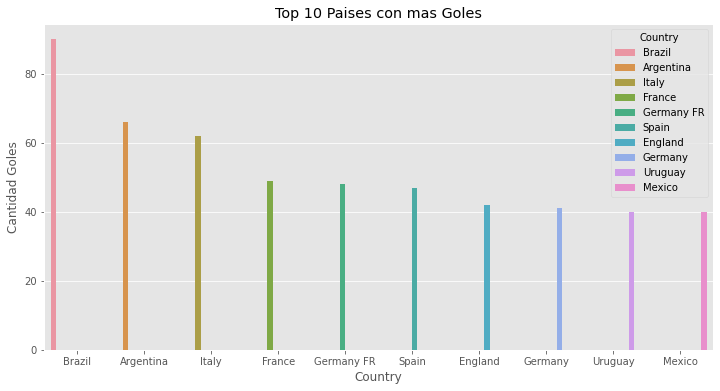

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
sns.barplot(x= 'Country' ,hue ='Country', y = 'Goles',  data = Goles[:10])
plt.xlabel('Country')
plt.ylabel('Cantidad Goles')
plt.title('Top 10 Paises con mas Goles')
plt.show()
